In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
file_path = 'data\cleaned_c2k_data.csv' 
data = pd.read_csv(file_path)

# Select relevant columns and handle missing values
relevant_columns = ['i1_rcs_p', 'i1_rcs_e', 'i1_dep_1_p', 'i1_dep_1_e', 'i1_rcf_1_p', 'i1_rcf_1_e', 'i1_hops']
data_selected = data[relevant_columns].replace('?', np.nan).dropna().astype(float)


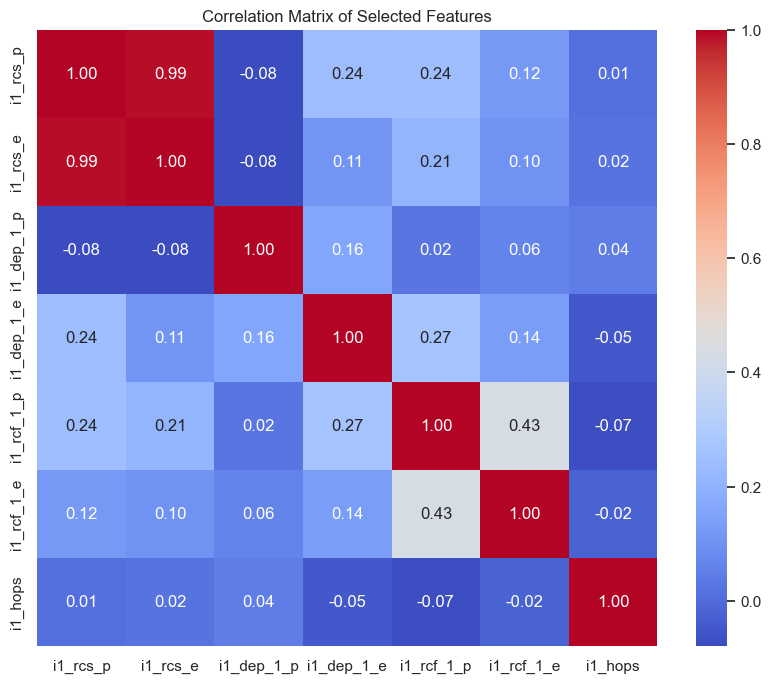

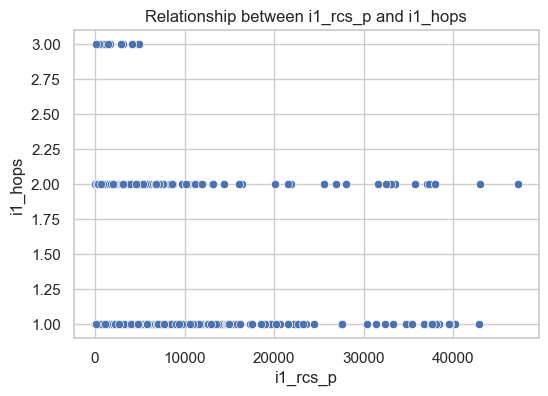

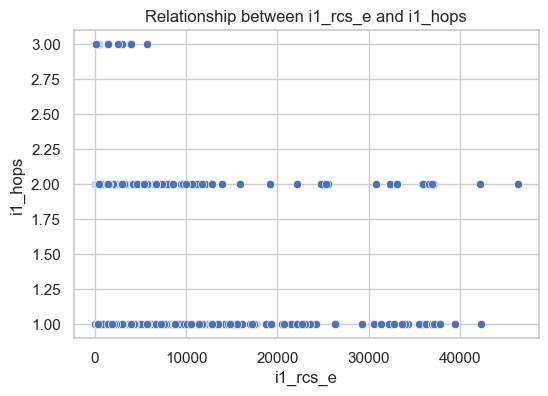

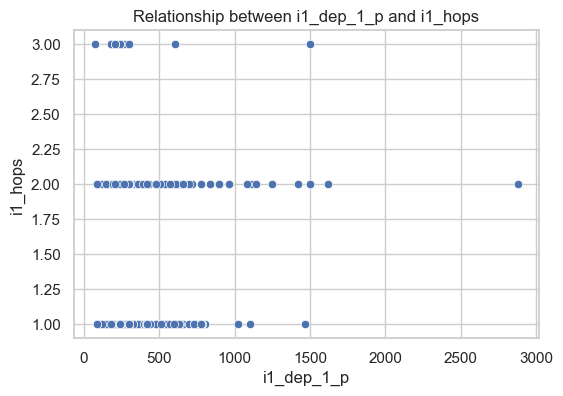

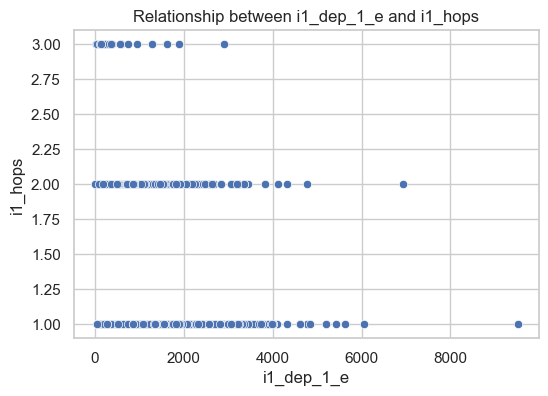

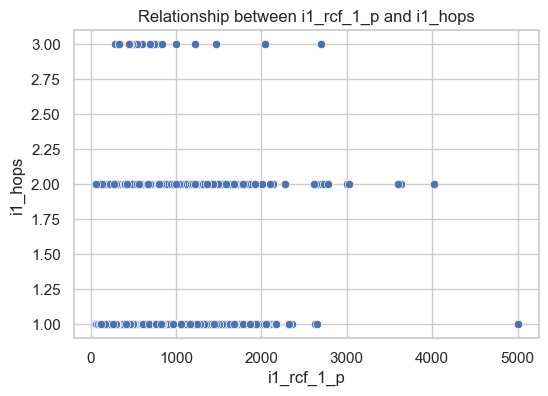

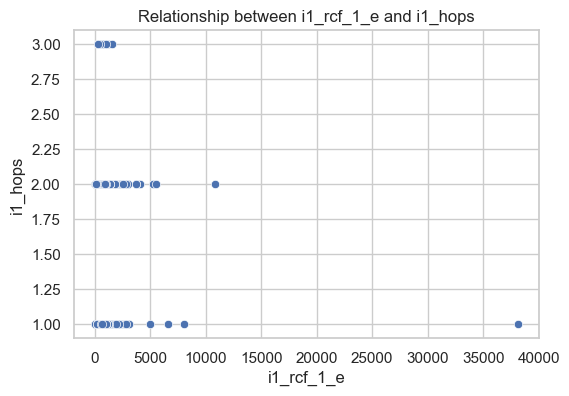

In [3]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting correlations among the selected features
corr_matrix = data_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Selected Features")
plt.show()

# Individual scatter plots
for column in data_selected.columns[:-1]:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data_selected, x=column, y='i1_hops')
    plt.title(f"Relationship between {column} and i1_hops")
    plt.show()


In [4]:
# Splitting the dataset into training and test sets
X = data_selected.drop('i1_hops', axis=1)
y = data_selected['i1_hops']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Making predictions
y_pred = regressor.predict(X_test)


In [5]:
# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Square Error: {rmse}")
print(f"R^2 Score: {r2}")


Root Mean Square Error: 0.3863497893047407
R^2 Score: 0.3094021716511086


In [6]:
# Additional Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.28940430925221805


In [7]:
# Replace this with your estimated future data
future_data = pd.DataFrame({
    'i1_rcs_p': [100],  
    'i1_rcs_e': [150],  
    'i1_dep_1_p': [100],  
    'i1_dep_1_e': [100],  
    'i1_rcf_1_p': [100], 
    'i1_rcf_1_e': [100]   
})

# Making future predictions
future_hops_pred = regressor.predict(future_data)
print("Predicted Number of Hops:", future_hops_pred)


Predicted Number of Hops: [1.55]
